In [ ]:
# SUPPORT VECTOR MACHINE

In [ ]:
# Dataset Selection:
#Data set Description described in another document “Drug Response Classification”
#Task 1: Exploratory Data Analysis (EDA)
#1.	Load the dataset and perform fundamental data exploration.
#2.	Utilize histograms, box plots, or density plots to understand feature distributions.
#3.	Investigate feature correlations to discern relationships within the data.

In [20]:
#Task 1: Exploratory Data Analysis (EDA)
#1.	Load the dataset and perform fundamental data exploration.

In [29]:
import pandas as pd
df= pd.read_csv("Pharma_Industry.csv")
df

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1
...,...,...,...,...,...,...
495,-1.553759,0.506938,0.817890,-0.661245,-1.345393,0
496,0.551476,1.714321,0.340589,1.712558,-0.496315,1
497,-1.072743,-0.221137,0.239247,1.112924,-0.285838,1
498,1.661259,0.245759,-0.457096,0.633355,0.657413,0


In [30]:
df.shape # There are 500 rows and 6 columns.

(500, 6)

In [31]:
df.describe()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000
mean,-0.037761,0.214957,0.062871,0.054398,-0.171863,0.5200
std,0.979891,1.247567,0.971978,0.986001,0.983765,0.5001
min,-3.019512,-3.773897,-2.940389,-3.401277,-3.110431,0.0000
25%,-0.642003,-0.565168,-0.648157,-0.586085,-0.797715,0.0000
50%,-0.019340,0.201532,0.027732,-0.065661,-0.108106,1.0000
75%,0.641151,0.951375,0.710774,0.633914,0.513555,1.0000
max,2.949094,4.111751,3.193108,3.373269,2.518023,1.0000


In [32]:
df.isnull().sum() # There are no null values in given data set.

Drug Dosage (mg)                  0
Systolic Blood Pressure (mmHg)    0
Heart Rate (BPM)                  0
Liver Toxicity Index (U/L)        0
Blood Glucose Level (mg/dL)       0
Drug Response                     0
dtype: int64

In [33]:
df.info() # There are two types of data sets float type and interger type, Drug Response is of interger data type and remaining are float data type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [34]:
#2.	Utilize histograms, box plots, or density plots to understand feature distributions

<Axes: ylabel='Frequency'>

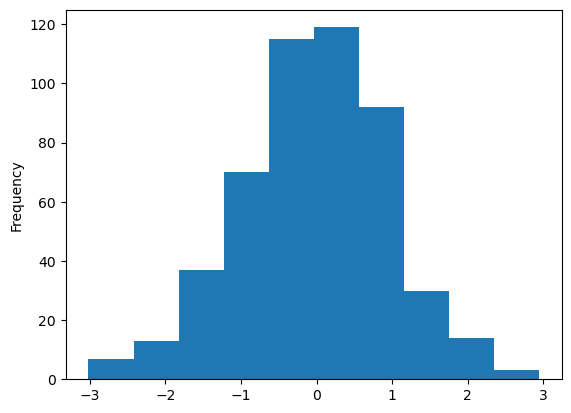

In [35]:
df['Drug Dosage (mg)'].plot(kind='hist') # Drug Dosage (mg) follows symmetric distribution

<Axes: ylabel='Frequency'>

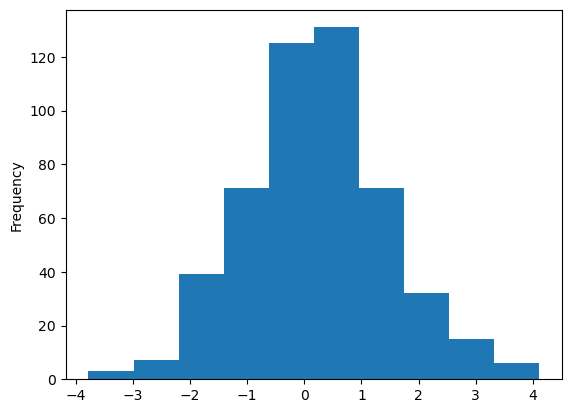

In [36]:
df['Systolic Blood Pressure (mmHg)'].plot(kind='hist')  # Systolic Blood Pressure (mmHg) also follows symmetrical distribution.

<Axes: ylabel='Frequency'>

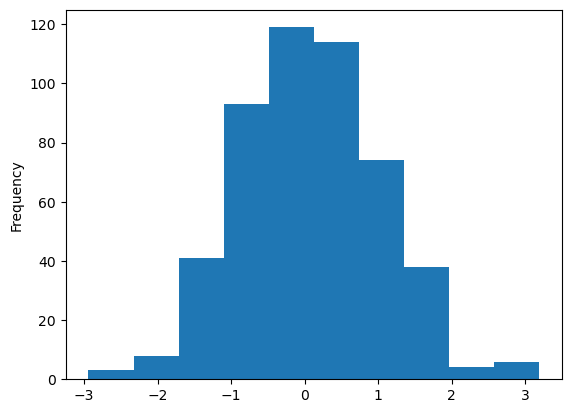

In [37]:
df['Heart Rate (BPM)'].plot(kind='hist') # Heart Rate (BPM) also follows symmetric distribution

<Axes: ylabel='Frequency'>

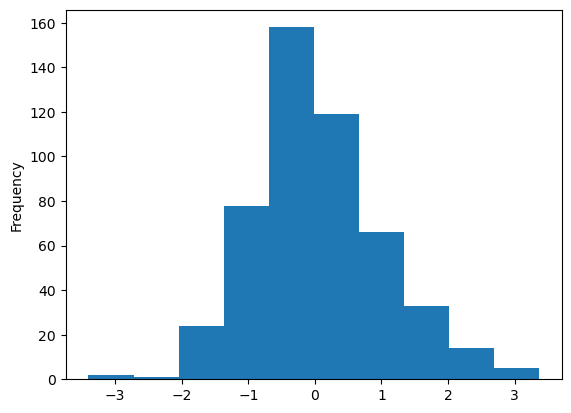

In [38]:
df['Liver Toxicity Index (U/L)'].plot(kind='hist') # Liver Toxicity Index (U/L) also follows symmetric distribution.

<Axes: ylabel='Frequency'>

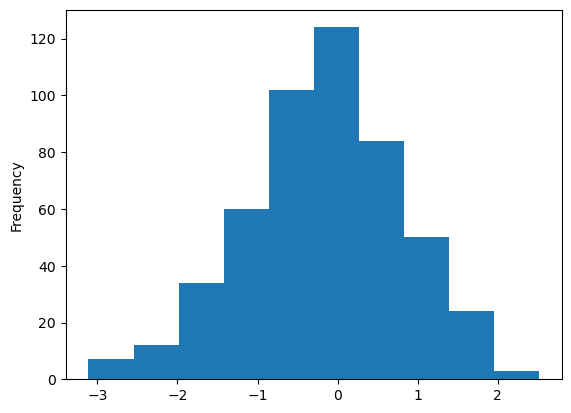

In [39]:
df['Blood Glucose Level (mg/dL)'].plot(kind='hist') # Blood Glucose Level (mg/dL) also follows symmetric distribution.

<Axes: ylabel='Frequency'>

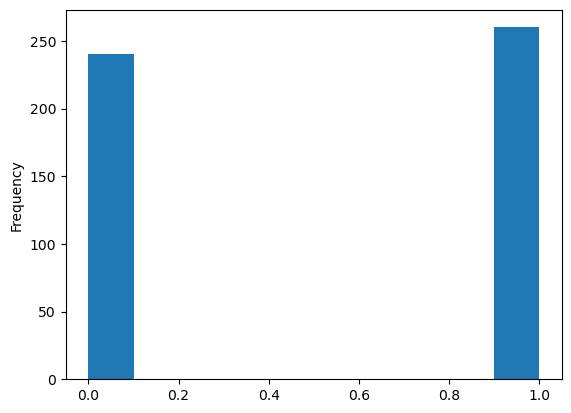

In [40]:
df['Drug Response'].plot(kind='hist') # Drug Response is not symmetric distribution and since it binary it shows only two outcomes 0 and 1. 

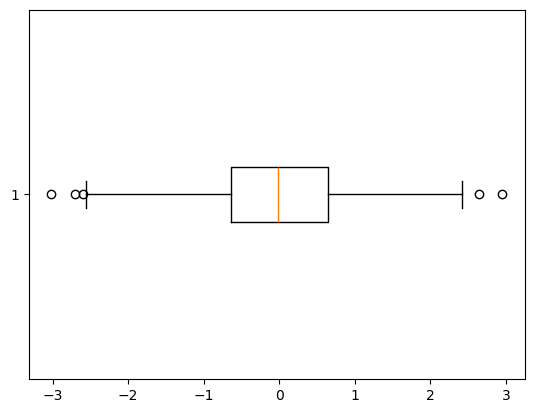

In [41]:
import matplotlib.pyplot as plt
plt.boxplot(df['Drug Dosage (mg)'],vert= False)
plt.show()

In [42]:
import numpy as np
q1=np.percentile(df['Drug Dosage (mg)'],25)
q2=np.percentile(df['Drug Dosage (mg)'],50)
q3=np.percentile(df['Drug Dosage (mg)'],75)
iqr= q3-q1
uw= q3+(iqr*1.5)
lw= q1-(iqr*1.5)
print(f"upper whisker length is {np.round(uw,2)}")
print(f"lower whisker length is {np.round(lw,2)}")

upper whisker length is 2.57
lower whisker length is -2.57


In [43]:
len(df[df['Drug Dosage (mg)']>uw])

2

In [44]:
len(df[df['Drug Dosage (mg)']<lw])

3

In [45]:
df.loc[df['Drug Dosage (mg)']>uw,'Drug Dosage (mg)']= uw

In [46]:
df.loc[df['Drug Dosage (mg)']<lw,'Drug Dosage (mg)']= lw

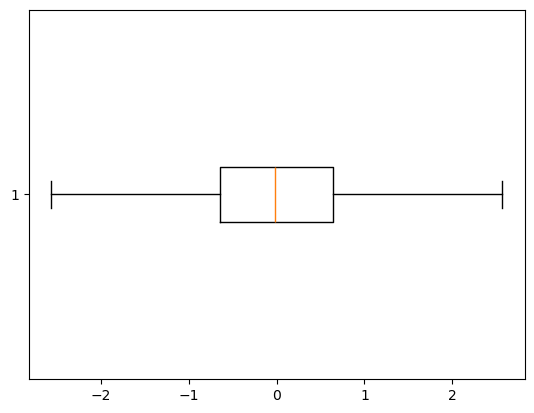

In [47]:
plt.boxplot(df['Drug Dosage (mg)'],vert= False) # The ouliers are identified and replaced with their nearest whisker lenght.
plt.show()

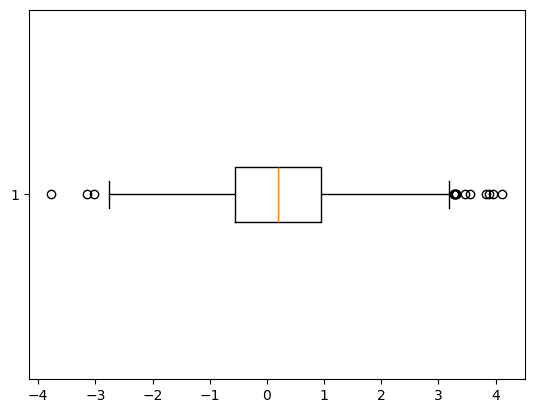

In [48]:
import matplotlib.pyplot as plt
plt.boxplot(df['Systolic Blood Pressure (mmHg)'],vert= False)
plt.show()

In [49]:
q1=np.percentile(df['Systolic Blood Pressure (mmHg)'],25)
q2=np.percentile(df['Systolic Blood Pressure (mmHg)'],50)
q3=np.percentile(df['Systolic Blood Pressure (mmHg)'],75)
iqr= q3-q1
uw= q3+(iqr*1.5)
lw= q1-(iqr*1.5)
print(f"upper whisker length is {np.round(uw,2)}")
print(f"lower whisker length is {np.round(lw,2)}")

upper whisker length is 3.23
lower whisker length is -2.84


In [50]:
len(df[df['Systolic Blood Pressure (mmHg)']>uw])

11

In [51]:
len(df[df['Systolic Blood Pressure (mmHg)']<lw])

3

In [52]:
df.loc[df['Systolic Blood Pressure (mmHg)']>uw,'Systolic Blood Pressure (mmHg)']= uw

In [53]:
df.loc[df['Systolic Blood Pressure (mmHg)']<lw,'Systolic Blood Pressure (mmHg)']= lw

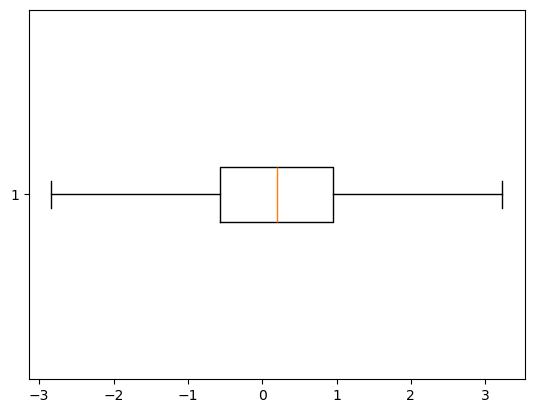

In [54]:
plt.boxplot(df['Systolic Blood Pressure (mmHg)'],vert= False)  # The ouliers are identified and replaced with their nearest whisker lenght.
plt.show()

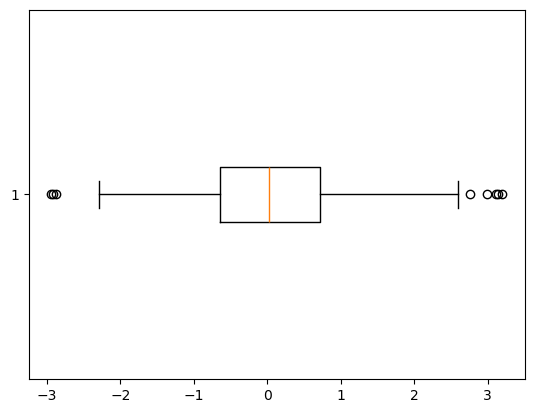

In [55]:
import matplotlib.pyplot as plt
plt.boxplot(df['Heart Rate (BPM)'],vert= False) # There are no outliers.
plt.show()

In [56]:
q1=np.percentile(df['Heart Rate (BPM)'],25)
q2=np.percentile(df['Heart Rate (BPM)'],50)
q3=np.percentile(df['Heart Rate (BPM)'],75)
iqr= q3-q1
uw= q3+(iqr*1.5)
lw= q1-(iqr*1.5)
print(f"upper whisker length is {np.round(uw,2)}")
print(f"lower whisker length is {np.round(lw,2)}")
len(df[df['Heart Rate (BPM)']>uw])
len(df[df['Heart Rate (BPM)']<lw])
print(f"length of ouliers above uw is {len(df[df['Heart Rate (BPM)']>uw])}")
print(f"length of ouliers below lw is {len(df[df['Heart Rate (BPM)']<lw])}")
df.loc[df['Heart Rate (BPM)']>uw,'Heart Rate (BPM)']= uw
df.loc[df['Heart Rate (BPM)']<lw,'Heart Rate (BPM)']= lw

upper whisker length is 2.75
lower whisker length is -2.69
length of ouliers above uw is 5
length of ouliers below lw is 3


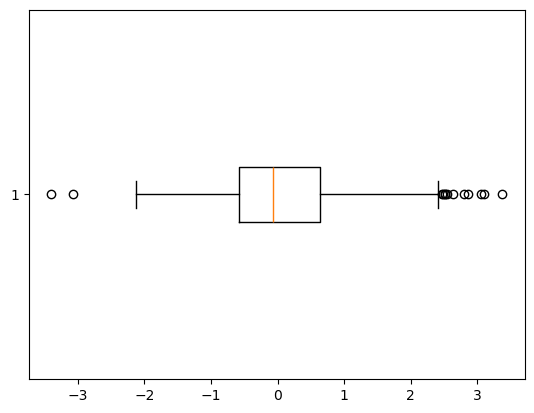

In [57]:
import matplotlib.pyplot as plt
plt.boxplot(df['Liver Toxicity Index (U/L)'],vert= False)
plt.show()

In [58]:
q1=np.percentile(df['Liver Toxicity Index (U/L)'],25)
q2=np.percentile(df['Liver Toxicity Index (U/L)'],50)
q3=np.percentile(df['Liver Toxicity Index (U/L)'],75)
iqr= q3-q1
uw= q3+(iqr*1.5)
lw= q1-(iqr*1.5)
print(f"upper whisker length is {np.round(uw,2)}")
print(f"lower whisker length is {np.round(lw,2)}")
len(df[df['Liver Toxicity Index (U/L)']>uw])
len(df[df['Liver Toxicity Index (U/L)']<lw])
print(f"length of ouliers above uw is {len(df[df['Liver Toxicity Index (U/L)']>uw])}")
print(f"length of ouliers below lw is {len(df[df['Liver Toxicity Index (U/L)']<lw])}")
df.loc[df['Liver Toxicity Index (U/L)']>uw,'Liver Toxicity Index (U/L)']= uw
df.loc[df['Liver Toxicity Index (U/L)']<lw,'Liver Toxicity Index (U/L)']= lw

upper whisker length is 2.46
lower whisker length is -2.42
length of ouliers above uw is 11
length of ouliers below lw is 2


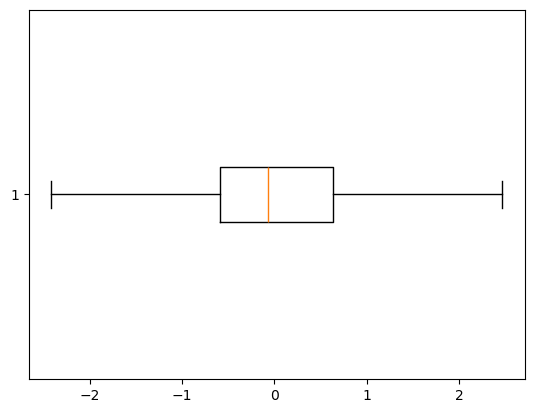

In [59]:
plt.boxplot(df['Liver Toxicity Index (U/L)'],vert= False)#The ouliers are identified and replaced with their nearest whisker lenght.
plt.show()

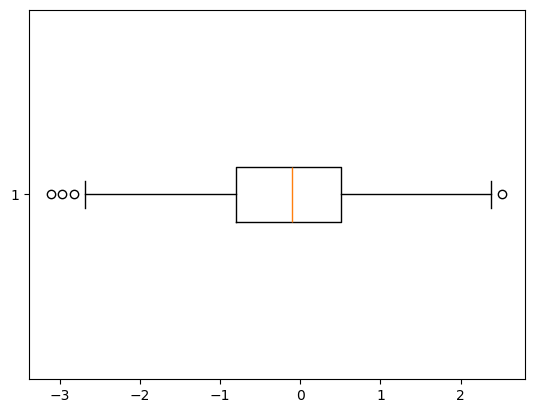

In [60]:
import matplotlib.pyplot as plt
plt.boxplot(df['Blood Glucose Level (mg/dL)'],vert= False)
plt.show()

In [61]:
q1=np.percentile(df['Blood Glucose Level (mg/dL)'],25)
q2=np.percentile(df['Blood Glucose Level (mg/dL)'],50)
q3=np.percentile(df['Blood Glucose Level (mg/dL)'],75)
iqr= q3-q1
uw= q3+(iqr*1.5)
lw= q1-(iqr*1.5)
print(f"upper whisker length is {np.round(uw,2)}")
print(f"lower whisker length is {np.round(lw,2)}")
len(df[df['Blood Glucose Level (mg/dL)']>uw])
len(df[df['Blood Glucose Level (mg/dL)']<lw])
print(f"length of ouliers above uw is {len(df[df['Blood Glucose Level (mg/dL)']>uw])}")
print(f"length of ouliers below lw is {len(df[df['Blood Glucose Level (mg/dL)']<lw])}")
df.loc[df['Blood Glucose Level (mg/dL)']>uw,'Blood Glucose Level (mg/dL)']= uw
df.loc[df['Blood Glucose Level (mg/dL)']<lw,'Blood Glucose Level (mg/dL)']= lw

upper whisker length is 2.48
lower whisker length is -2.76
length of ouliers above uw is 1
length of ouliers below lw is 3


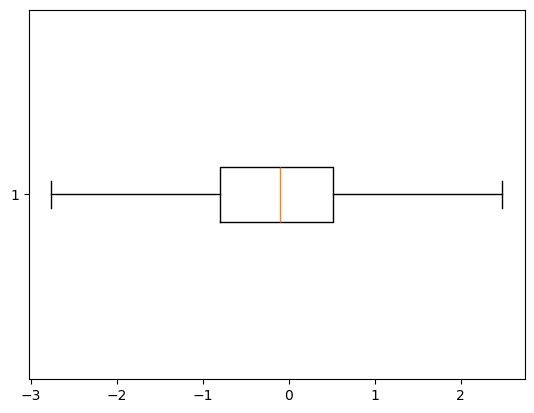

In [62]:
import matplotlib.pyplot as plt
plt.boxplot(df['Blood Glucose Level (mg/dL)'],vert= False)##The ouliers are identified and replaced with their nearest whisker lenght.
plt.show()

In [63]:
# Now the outliers are removed from the given data set.

In [64]:
#3.	Investigate feature correlations to discern relationships within the data.

In [65]:
df.corr()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
Drug Dosage (mg),1.000000,0.087760,0.040512,0.128059,0.010070,0.043340
Systolic Blood Pressure (mmHg),0.087760,1.000000,-0.041466,0.273864,0.041263,0.308012
Heart Rate (BPM),0.040512,-0.041466,1.000000,0.004618,0.051423,-0.011235
Liver Toxicity Index (U/L),0.128059,0.273864,0.004618,1.000000,0.229714,0.437289
Blood Glucose Level (mg/dL),0.010070,0.041263,0.051423,0.229714,1.000000,0.169445
Drug Response,0.043340,0.308012,-0.011235,0.437289,0.169445,1.000000


In [66]:
# Drug Dosage (mg)	 is having postive relationship with Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response.
#Heart Rate (BPM) is having postive relationship with Drug Dosage (mg),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL).
# Liver Toxicity Index (U/L) is having postive relationship with Drug Dosage (mg),Heart Rate (BPM),Blood Glucose Level (mg/dL),Drug Response.
# Blood Glucose Level (mg/dL) is having postive relationship with Drug Dosage (mg),Heart Rate (BPM),Liver Toxicity Index (U/L),Drug Response.
# Drug Response	 is having postive relationship with Drug Dosage (mg),Liver Toxicity Index (U/L),Liver Toxicity Index (U/L).

In [67]:
df.var()

Drug Dosage (mg)                  0.948258
Systolic Blood Pressure (mmHg)    1.486935
Heart Rate (BPM)                  0.920426
Liver Toxicity Index (U/L)        0.917958
Blood Glucose Level (mg/dL)       0.960590
Drug Response                     0.250100
dtype: float64

In [68]:
# since variance of Systolic Blood Pressure (mmHg) is very very small and is almost constant.
# It is better to drop that column from corr and for the machine learning model.

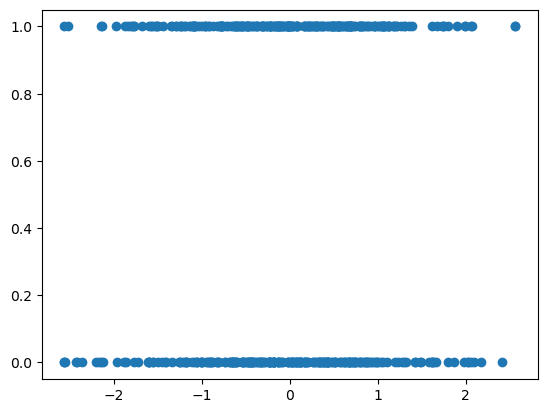

In [69]:
import matplotlib.pyplot as plt
plt.scatter(df['Drug Dosage (mg)'],df['Drug Response'])
plt.show()

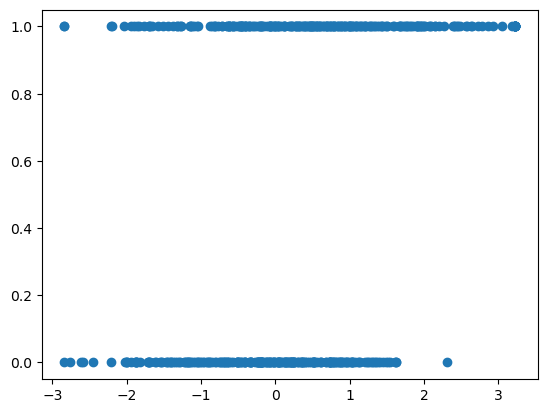

In [70]:
import matplotlib.pyplot as plt
plt.scatter(df['Systolic Blood Pressure (mmHg)'],df['Drug Response'])
plt.show()

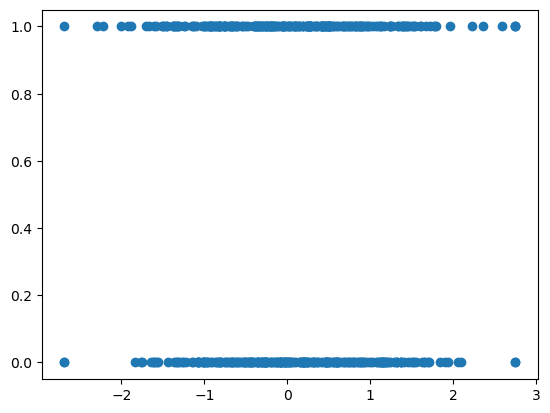

In [71]:
import matplotlib.pyplot as plt
plt.scatter(df['Heart Rate (BPM)'],df['Drug Response'])
plt.show()

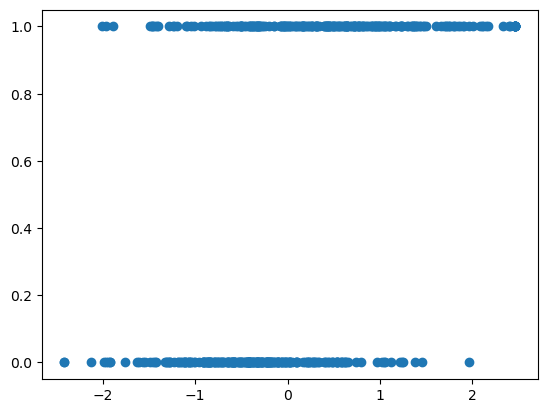

In [72]:
import matplotlib.pyplot as plt
plt.scatter(df['Liver Toxicity Index (U/L)'],df['Drug Response'])
plt.show()

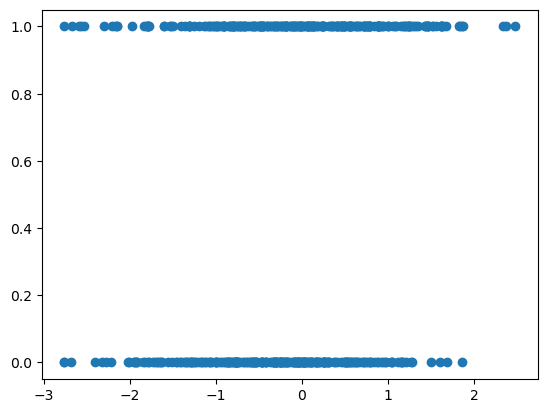

In [73]:
import matplotlib.pyplot as plt
plt.scatter(df['Blood Glucose Level (mg/dL)'],df['Drug Response'])
plt.show()

In [74]:
# Task 2: Data Preprocessing
#1.	Encode categorical variables if necessary.
#2.	Split the dataset into training and testing sets.

In [75]:
# Task 2: Data Preprocessing
#1.	Encode categorical variables if necessary.
# only one column is categorial column but it is already encoded into binary.So, need of encoding again.

In [76]:
#2.	Split the dataset into training and testing sets.

In [77]:
X=df.drop('Drug Response',axis=1)
Y= df['Drug Response']

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=42)

In [79]:
X_train.shape

(400, 5)

In [80]:
X_test.shape

(100, 5)

In [81]:
Y_train.shape

(400,)

In [82]:
Y_test.shape

(100,)

In [83]:
#Task 3: Data Visualization
#1.	Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.
#2.	Visualize class distributions to gauge dataset balance or imbalance.

In [84]:
#1.	Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.

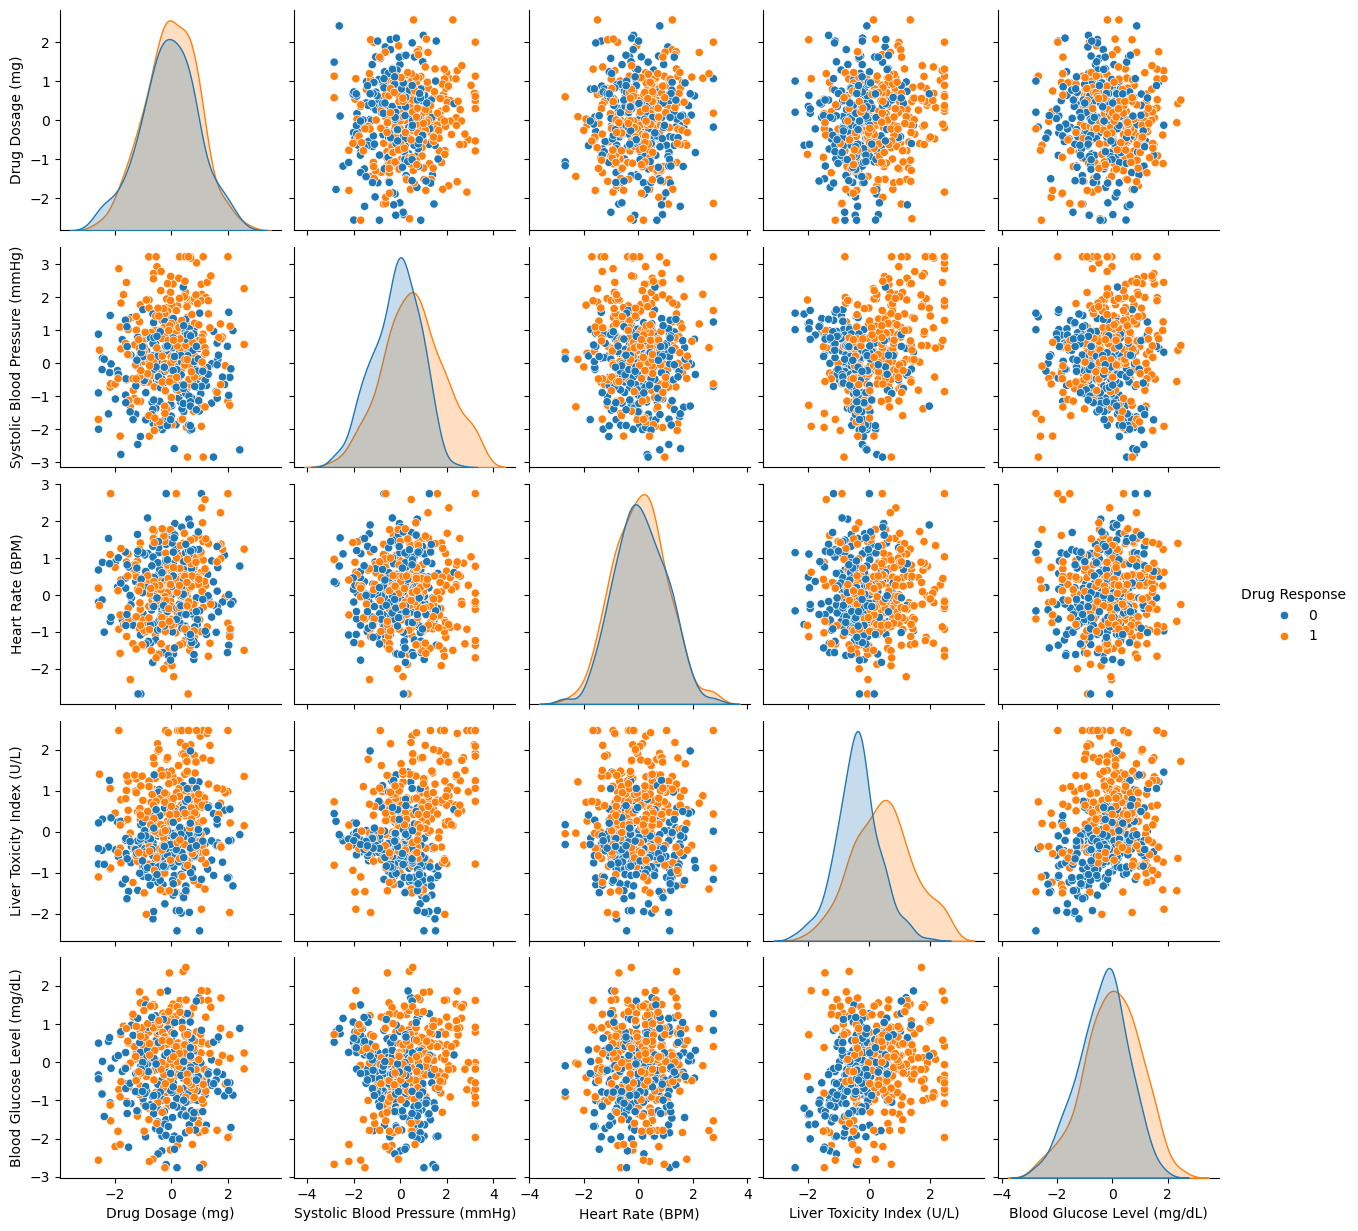

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df,hue="Drug Response")
plt.show()

In [86]:
#2.	Visualize class distributions to gauge dataset balance or imbalance.

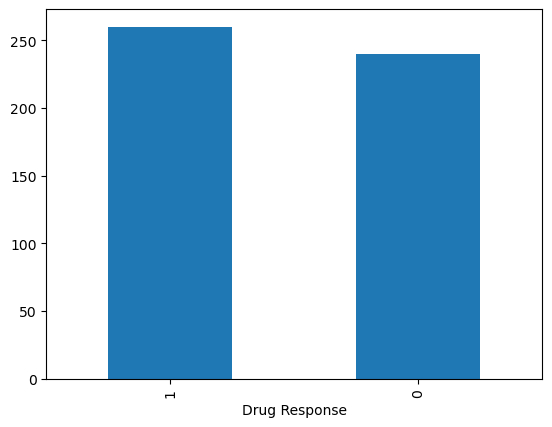

In [87]:
# plotting Bar graph
import matplotlib.pyplot as plt
df['Drug Response'].value_counts().plot(kind='bar')
plt.show()

In [88]:
#Task 4: SVM Implementation
#1.	Implement a basic SVM classifier using Python libraries like scikit-learn.
#2.	Train the SVM model on the training data.
#3.	Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).

In [89]:
#Task 4: SVM Implementation
#1.	Implement a basic SVM classifier using Python libraries like scikit-learn.
from sklearn.svm import SVC
model = SVC(kernel='linear',C=1)

In [90]:
#2.	Train the SVM model on the training data.
model.fit(X_train,Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

In [91]:
#3.	Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
train_accuracy = accuracy_score(Y_train,Y_pred_train )
test_accuracy = accuracy_score(Y_test,Y_pred_test )
print("accuracy score for training data is",train_accuracy)
print("accuracy score for testing data is",test_accuracy)

accuracy score for training data is 0.705
accuracy score for testing data is 0.77


In [92]:
train_precision= precision_score(Y_train,Y_pred_train )
test_precision = precision_score(Y_test,Y_pred_test )
print("precision score for training data is",np.round(train_precision,2))
print("precision score for testing data is",np.round(test_precision,2))

precision score for training data is 0.76
precision score for testing data is 0.84


In [93]:
train_recall= recall_score(Y_train,Y_pred_train )
test_recall= recall_score(Y_test,Y_pred_test )
print("recall score for training data is",np.round(train_recall,2))
print("recall score for testing data is",np.round(test_recall,2))

recall score for training data is 0.62
recall score for testing data is 0.73


In [94]:
train_f1= f1_score(Y_train,Y_pred_train )
test_f1= f1_score(Y_test,Y_pred_test )
print("f1 score for training data is",np.round(train_f1,2))
print("f1 score for testing data is",np.round(test_f1,2))

f1 score for training data is 0.68
f1 score for testing data is 0.78


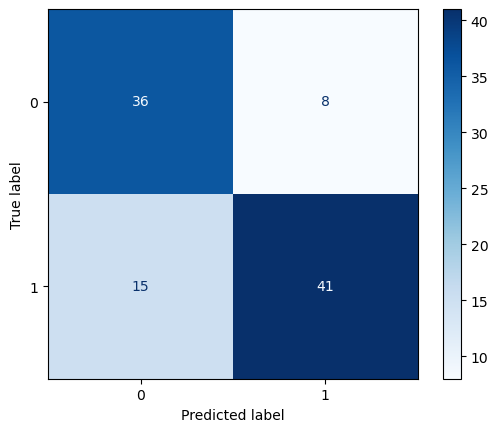

In [97]:
#Task 5: Visualization of SVM Results
#1.	Visualize classification results on the testing data
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
cm = confusion_matrix(Y_test,Y_pred_test)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Blues')
plt.show()

In [99]:
print("Classification Report:")
print(classification_report(Y_test,Y_pred_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.82      0.76        44
           1       0.84      0.73      0.78        56

    accuracy                           0.77       100
   macro avg       0.77      0.78      0.77       100
weighted avg       0.78      0.77      0.77       100



In [110]:
#Task 6: Parameter Tuning and Optimization
#1.	Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance
# Grid Search CV
from sklearn.model_selection import GridSearchCV
param_grid=[
    {'C': [0.1, 1, 10], 'kernel': ['linear']},  # linear kernel
    {'C': [0.1, 1, 10], 'kernel': ['rbf'], 'gamma': [0.01, 0.1, 1]},  # RBF kernel
    {'C': [0.1, 1, 10], 'kernel': ['poly'], 'degree': [2, 3], 'gamma': [0.01, 0.1, 1]}  # Poly kernel
]

In [111]:
svm_model= SVC(probability=True)

In [112]:
grid_search= GridSearchCV(svm_model,param_grid,cv=10,scoring='accuracy',n_jobs=-1,verbose=2)
grid_search.fit(X_train,Y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=SVC(probability=True), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1],
                          'kernel': ['rbf']},
                         {'C': [0.1, 1, 10], 'degree': [2, 3],
                          'gamma': [0.01, 0.1, 1], 'kernel': ['poly']}],
             scoring='accuracy', verbose=2)

In [113]:
print("Best Parameters:",grid_search.best_params_)
best_svm= grid_search.best_estimator_
print("Test accuracy:", best_svm.score(X_test,Y_test))

Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Test accuracy: 0.78


In [ ]:
#Task 7: Comparison and Analysis
#1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).
#2.	Analyze SVM strengths and weaknesses for the dataset based on EDA and visualization results.
#3.	Discuss practical implications of SVM in real-world classification tasks.

In [ ]:
#Task 7: Comparison and Analysis
#1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).

In [114]:
# SVM performance with kernal linear
from sklearn.svm import SVC
model = SVC(kernel='linear',C=0.1)
model.fit(X_train,Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
train_accuracy = accuracy_score(Y_train,Y_pred_train )
test_accuracy = accuracy_score(Y_test,Y_pred_test )
print("accuracy score for training data is",train_accuracy)
print("accuracy score for testing data is",test_accuracy)

accuracy score for training data is 0.6975
accuracy score for testing data is 0.77


In [116]:
# SVM performance with kernal polynomial with degree=2
from sklearn.svm import SVC
model = SVC(kernel='poly',degree=2)
model.fit(X_train,Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
train_accuracy = accuracy_score(Y_train,Y_pred_train )
test_accuracy = accuracy_score(Y_test,Y_pred_test )
print("accuracy score for training data is",train_accuracy)
print("accuracy score for testing data is",test_accuracy)

accuracy score for training data is 0.715
accuracy score for testing data is 0.7


In [117]:
# SVM performance with kernal rbf with gamma=1
from sklearn.svm import SVC
model = SVC(kernel='rbf',gamma=1)
model.fit(X_train,Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
train_accuracy = accuracy_score(Y_train,Y_pred_train )
test_accuracy = accuracy_score(Y_test,Y_pred_test )
print("accuracy score for training data is",train_accuracy)
print("accuracy score for testing data is",test_accuracy)

accuracy score for training data is 0.905
accuracy score for testing data is 0.78


In [ ]:
# While comparing SVM performance with various kernels ,we found that we are getting good accuracy score for the model while using 
# the kernal rbf with gamma=1

In [ ]:
#2.	Analyze SVM strengths and weaknesses for the dataset based on EDA and visualization results.

In [ ]:
# Strengths of SVM for Your Dataset
# Since our data is having  binary class target variable our SVM model suits well.
# By using grid search cv we found best kernal and other parameters and got good accuracy score and F1_score so our model is good.
# It also avoid overfitting for selecting best C value.
# Weeknesses of SVM for Your Dataset
# If we does not chose proper parameter like if C is very low or very high it may lead to overfitting or underfitting.
# If we are having large number of features  this model may not suit better and it slows down.
# SVM is very sensitive to feature scale.You must apply standardization or normalization, otherwise results are skewed.

In [ ]:
#3.	Discuss practical implications of SVM in real-world classification tasks.
# In medical industry, for testing new medicine and finding its efficiency.
# In commerce, finding review the store by getting their purchase details.
# In digital platforms ,finding the feedback whether any product or service is good or bad.